In [10]:
import os
import torch
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import pickle
import sys
from tqdm import tqdm
import json
sys.path.append('../')
from utils import get_data_labels, project_root
from sklearn.model_selection import train_test_split

root = project_root()
# def test_dim_red(n, split=True):
#     annotations = 'annotations.csv'
#     atlas = 'schaefer'
#     dataroot = f'fc_matrices/{atlas}/'


#     categories = ['patient_n','condition','bdi_before']

#     data_labels = get_data_labels()
#     data_labels = data_labels[categories]

#     data_labels.loc[data_labels["condition"] == "P", "condition"] = 1
#     data_labels.loc[data_labels["condition"] == "E", "condition"] = -1
#     data_labels['condition'] = data_labels['condition'].astype('float64')

#     # Load the dataset
#     dataset = BrainGraphDataset(img_dir=os.path.join(root, dataroot), 
#                                 annotations_file=os.path.join(root, annotations),
#                                 transform=None, extra_data=data_labels, setting='upper_triangular')
#     averaging_len=30
#     # Create a dataloader
#     batch_size = 50

#     scores = 0

#     for i in tqdm(range(averaging_len)):
#         if split:
#             # Split the dataset into train and test sets
#             train_set, test_set = train_test_split(dataset, test_size=0.2)

#             # Create data loaders for train and test sets

#             test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=True)
#         else:
#             train_set = dataset

#         train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)

#         # Define a function to scale the input variables
#         scaler = StandardScaler()
        
#         def scale_data(X):
#             X_scaled = scaler.fit_transform(X)
#             return X_scaled

#         # Train PLS regression models with 1 to 10 components and compute R-squared scores
    
#         # set the correct regressor
#         regr = PLSRegression(n_components=n)
            
#         r2_list = []
#         for (X_batch), y_batch in train_loader:

#             X_batch = scale_data(X_batch.detach().numpy())
#             y_batch = y_batch.detach().numpy()
            
#             regr.fit(X_batch, y_batch)

#         if split:
#             for X_batch, y_batch in test_loader:

#                 X_batch = scale_data(X_batch.detach().numpy())
#                 y_batch = y_batch.detach().numpy()
                
#                 scores += regr.score(X_batch, y_batch)

#         with open(os.path.join(root, 'dim_red', f"{mode}_params/model_{mode}_{n}.pkl"), "wb") as f:
#             pickle.dump(regr, f)

#     return scores / averaging_len

In [11]:
components = range(1, 10)

# r2_scores_pls = []
# for i in components:
#     print(f'Now testing {i} components')
#     r2_scores_pls.append(test_dim_red(i))

In [12]:
# scores = {'pls': r2_scores_pls}

# with open('pls.json', 'w') as f:
#     json.dump(scores, f)

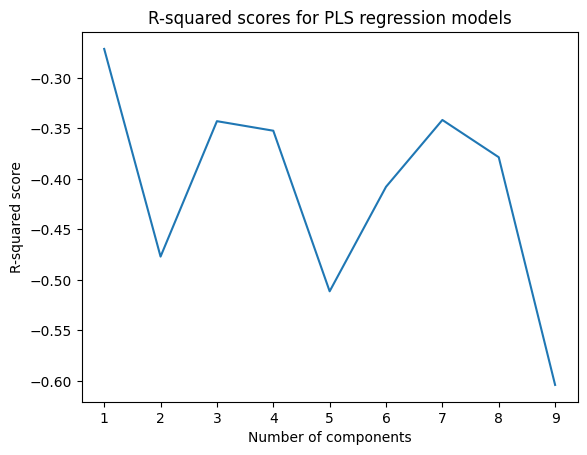

In [15]:
# Plot the R-squared scores
with open(os.path.join(root, 'dim_red/pls.json')) as f:
    r2_scores_pls = json.load(f)['pls']

plt.plot(components, r2_scores_pls)
plt.title('R-squared scores for PLS regression models')
plt.xlabel('Number of components')
plt.ylabel('R-squared score')
plt.savefig('r2_pls.png')
plt.show()